**PROBABILITY DISTRIBUTIONS**


Ресурсы

*   scipy stats https://docs.scipy.org/doc/scipy/reference/stats.html
*   tutorial 1 https://www.datacamp.com/community/tutorials/probability-distributions-python
*   tutorial 2 https://web.stanford.edu/class/cs109/handouts/python.html






In [878]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

## Bernoulli

$$X = \begin{cases} 1, \; w.p. \; p\\ 0, \; w.p. \; 1-p \end{cases}$$

Support $\{0,1 \}$

In [879]:
from scipy.stats import bernoulli

In [880]:
p = 0.3
mean, var = bernoulli.stats(p, moments='mv')
print(mean, var)

0.3 0.21


In [881]:
rv_bernoulli = bernoulli(p)
type(rv_bernoulli)

scipy.stats._distn_infrastructure.rv_frozen

In [882]:
rv_bernoulli.pmf([0,1])

array([0.7, 0.3])

In [883]:
rv_bernoulli.pmf([2])

array([0.])

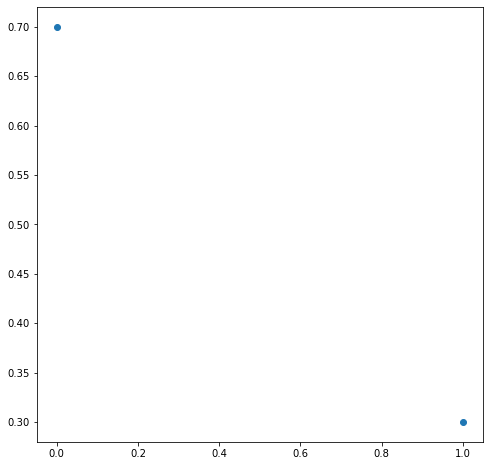

In [884]:
plt.scatter([0,1],rv_bernoulli.pmf([0,1]))

In [885]:
rv_bernoulli.cdf([0,1])

array([0.7, 1. ])

**Подкидываем монетку!!!**

In [886]:
rv_bernoulli.rvs()

1

In [887]:
rv_bernoulli.rvs(size=100)

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

Постройте гистограмму распределения бернули для size=1000

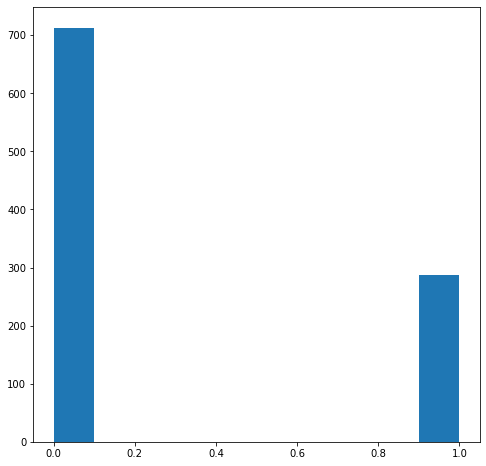

In [888]:
data = rv_bernoulli.rvs(size=1000)
plt.hist(data)
plt.show()

## Binomial

$$p_X(k)= \binom{n}{k}p^k(1-p)^{n-k}$$

Support $[0,n]$

In [889]:
from scipy.stats import binom

In [890]:
n, p = 10, 0.3

In [891]:
rv_binom = binom(n, p)
mean, var = rv_binom.stats(moments='mv')
print(mean, var)

3.0 2.0999999999999996


In [892]:
rv_binom.var()

2.0999999999999996

In [893]:
rv_binom.mean()

3.0

Постройте точечный график биномиального распределения на отрезке [-10, 10]

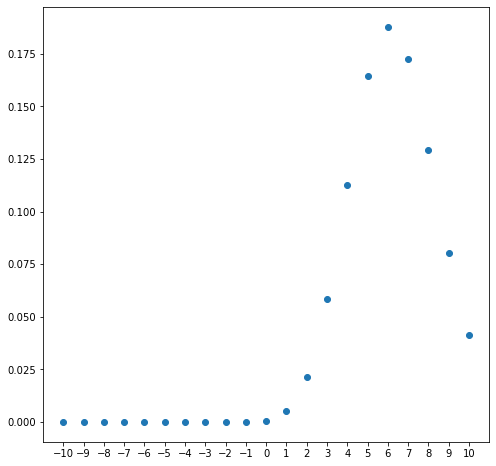

In [894]:
# is that right ??
x = np.arange(-10, 11, 1)
rv_binom2 = binom(len(x), 0.3)

plt.scatter(x, rv_binom2.pmf(x))
plt.xticks(x)
plt.show()

$P(X=4)$ ?

In [895]:
X = 4
rv_binom2.pmf(X)

0.11277578372328766

Постройте график кумулятивного биномиального распределения на отрезке [-10, 10]

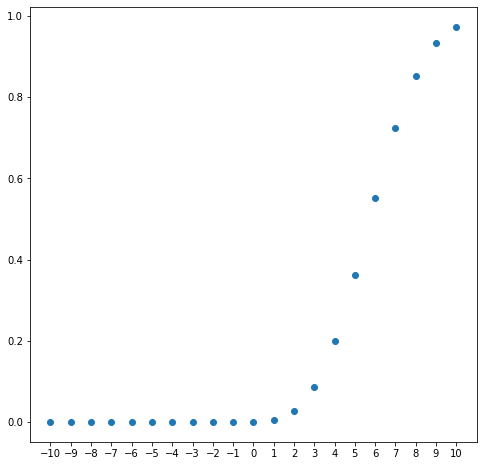

In [896]:
plt.scatter(x, rv_binom2.cdf(x))
plt.xticks(x)
plt.show()

$P(X≤4)$ ?

In [897]:
rv_binom2.cdf(X)

0.19838148656544022

### **Random samples**

In [898]:
rv_binom.rvs()

1

In [899]:
rv_binom.rvs(100)

array([3, 1, 1, 1, 5, 2, 4, 4, 2, 3, 4, 4, 3, 2, 6, 1, 3, 1, 1, 3, 4, 1,
       2, 3, 5, 1, 5, 3, 2, 1, 3, 4, 2, 2, 5, 4, 5, 2, 6, 2, 3, 4, 6, 7,
       2, 4, 1, 4, 3, 4, 6, 1, 0, 0, 4, 3, 3, 1, 4, 4, 3, 4, 4, 3, 1, 3,
       4, 2, 2, 2, 3, 5, 5, 0, 3, 2, 4, 1, 2, 2, 3, 1, 3, 3, 4, 2, 4, 1,
       3, 2, 4, 4, 3, 3, 3, 1, 1, 3, 3, 2])

Постройте гистограмму биномиального распределения для size=10000, bins=10


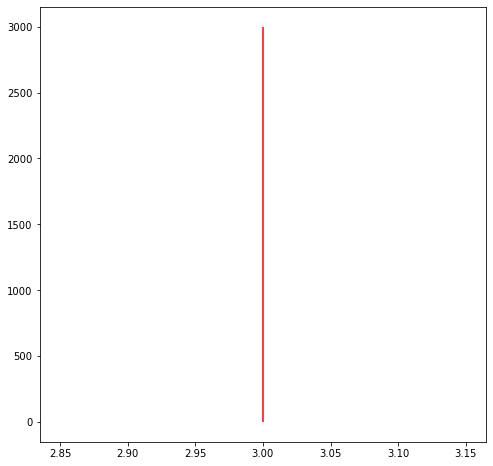

In [900]:
plt.vlines(rv_binom.mean(),0,10000*p, colors=['r'])

Постройте для n = 10000

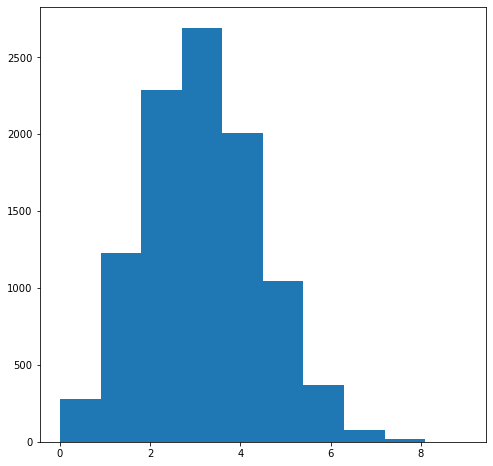

In [901]:
n, p = 10000, 0.3
rv_binom3 = binom(n, p)
plt.hist(rv_binom.rvs(size=10000), bins=10)
plt.show()

## Poisson

$$p_X(k)=e^{- \lambda}\frac{\lambda^k}{k!}$$

In [902]:
from scipy.stats import poisson

In [903]:
mu = 6
rv_poisson = poisson(mu)
rv_poisson.std()

2.449489742783178

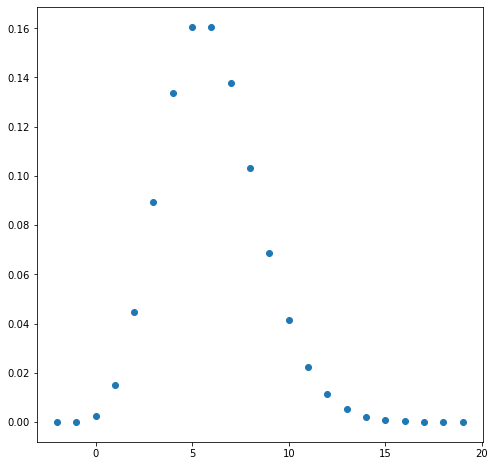

In [904]:
x = np.arange(-2,20,1)
plt.scatter(x, rv_poisson.pmf(x))
plt.show()

$P(X≤10)$

In [905]:
rv_poisson.cdf(10)

0.957379076417462

$P(X=10)$

In [906]:
rv_poisson.pmf(10)

0.04130309341233764

Постройте гистограмму распределения Пуассона bins = 12, и границы стандартного отклонения

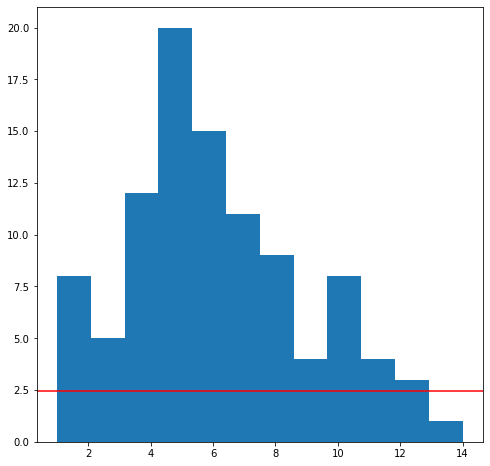

In [907]:
fig , ax = plt.subplots(1, 1)
ax.hist(rv_poisson.rvs(100), bins=12)
ax.axhline(rv_poisson.std(), color='r')
plt.show()

# **Continuous distributions**

## **Uniform (равномерное)**

In [908]:
from scipy.stats import uniform

## Uniform supported $[0,1]$

$f_X(X)=1$, if $x \in [0,1]$

Support $[0,1]$

In [909]:
rv_uniform_1 = uniform()

In [910]:
print(rv_uniform_1.mean())
print(rv_uniform_1.var())

0.5
0.08333333333333333


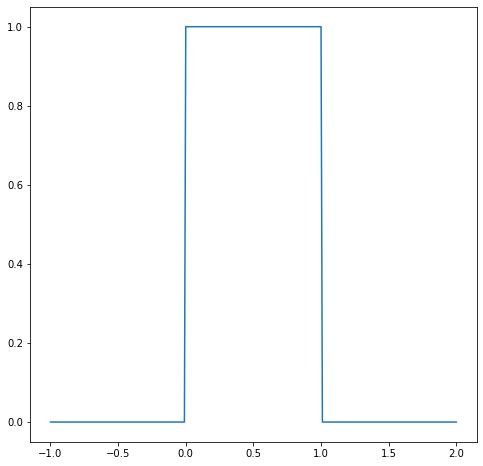

In [911]:
plt.plot([-1,-0.01,0,1,1.01,2], rv_uniform_1.pdf([-1,-0.01,0,1,1.01,2]))

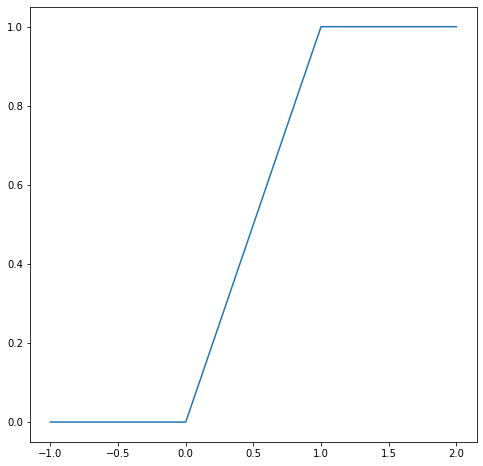

In [912]:
plt.plot([-1,-0.01,0,1,1.01,2], rv_uniform_1.cdf([-1,-0.01,0,1,1.01,2]))

Постройте гистограмму равномерного распределения для size=1000

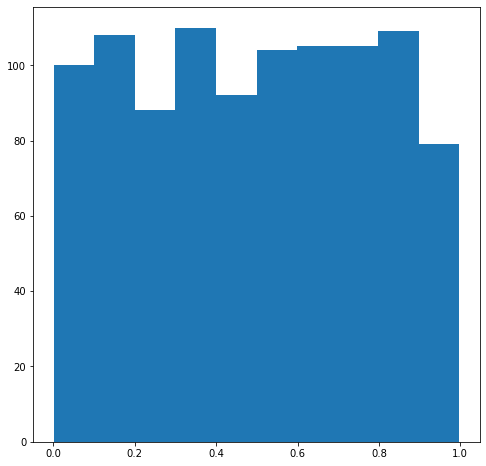

In [913]:
plt.hist(rv_uniform_1.rvs(1000))
plt.show()

## Exponential

$$f_X(x)= \begin{cases} \lambda e^{- \lambda x}, x≥0\\ 0, x<0 \end{cases}$$

$$E[X]=\frac{1}{\lambda}$$

$$Var[X]=\frac{1}{\lambda^2}$$

Support $[0,+\infty]$

In [914]:
from scipy.stats import expon

In [915]:
lamb = 1
rv_exp_1 = expon(scale=1/lamb, loc=0)
print(rv_exp_1.mean())
print(rv_exp_1.var())

1.0
1.0


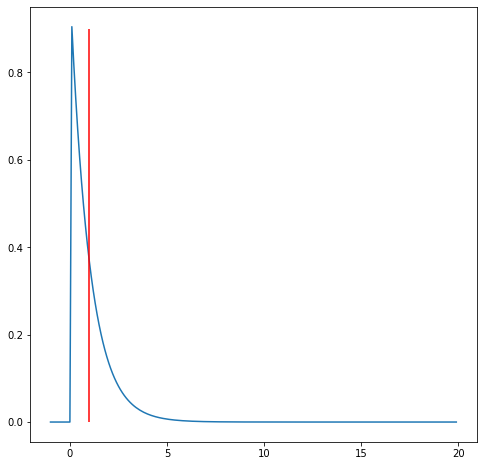

In [916]:
x = np.arange(-1,20,0.1)
plt.plot(x,rv_exp_1.pdf(x))
plt.vlines(rv_exp_1.mean(),0,0.9, colors=['r'])

2.0
4.0


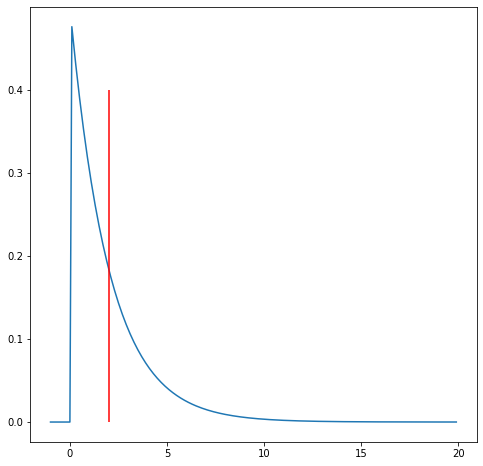

In [917]:
lamb = 0.5
rv_exp_3 = expon(scale=1/lamb, loc=0)
print(rv_exp_3.mean())
print(rv_exp_3.var())

plt.plot(x,rv_exp_3.pdf(x))
plt.vlines(rv_exp_3.mean(),0,0.4, colors=['r'])

Допустим, что смещённым экспоненциальным распределением с праметром $\lambda=0.5$ моделируется время до сбоя двигателя в автомобиле после 10 лет эксплуатации. Сколько месяцев отработает двигатель при вероятности сбоя в 60%?

$q_\alpha=F^{-1}(1-\alpha)=F^{-1}(0.6)$

In [918]:
lamb = 0.5
rv_exp_d = expon(scale=1/lamb, loc=0)

rv_exp_d.isf(0.6)

1.0216512475319814

## Normal

$$N(\mu,\sigma^2): \; f_X(x)=\frac{1}{\sigma\sqrt{2 \pi}}e^{-\frac{1}{2 \sigma^2}(x-\mu)^2}$$

$$E[X]=\mu, \; Var(X)=\sigma^2$$

Support $[-\infty,+\infty]$

In [919]:
from scipy.stats import norm

In [920]:
mu=0
sigma=1
rv_norm_1 = norm(loc=mu, scale=sigma)
print(rv_norm_1.mean())
print(rv_norm_1.var())

0.0
1.0


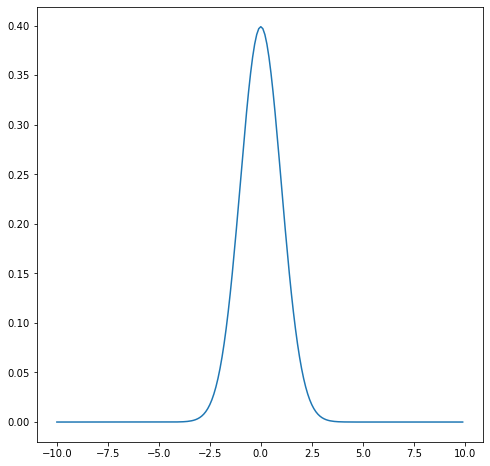

In [921]:
x = np.arange(-10,10,0.1)
plt.plot(x,rv_norm_1.pdf(x))

In [922]:
mu=0
sigma=4
rv_norm_2 = norm(loc=mu, scale=sigma)
print(rv_norm_2.mean())
print(rv_norm_2.var())

0.0
16.0


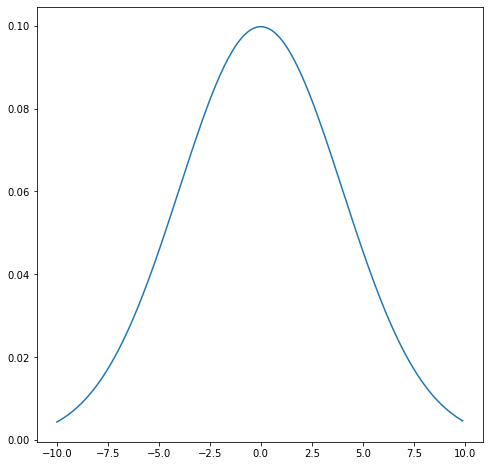

In [923]:
x = np.arange(-10,10,0.1)
plt.plot(x,rv_norm_2.pdf(x))

$P(X≤-100)$

In [935]:
rv_norm_2.cdf(-100)

3.056696706382561e-138

Предположим, что распределение роста студентов Владивостока моделируется нормальным распределением с параметрами 𝜇=175, 𝜎=20. Какова вероятность найти студента с ростом меньше 140 см?

In [931]:
mu = 175
sigma = 20
rv_norm_d = norm(loc=mu, scale=sigma)
rv_norm_d.cdf(140)

0.040059156863817086